In [1]:
%matplotlib inline
# from preamble import *

## Supervised Learning
### Classification and Regression

### Supervised Machine Learning Algorithms
#### Some Sample Datasets

X.shape: (26, 2)


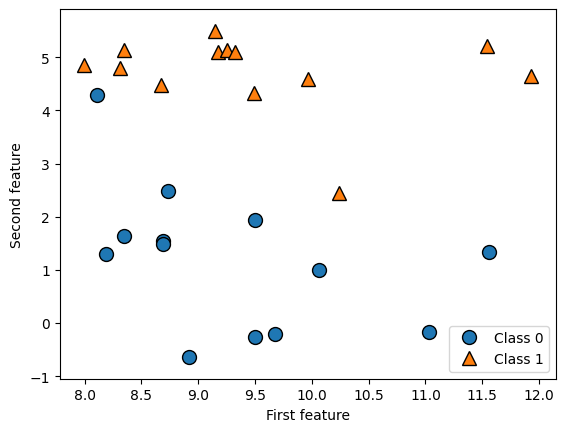

In [2]:
# generate dataset
import mglearn
import matplotlib.pyplot as plt
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)

Text(0, 0.5, 'Target')

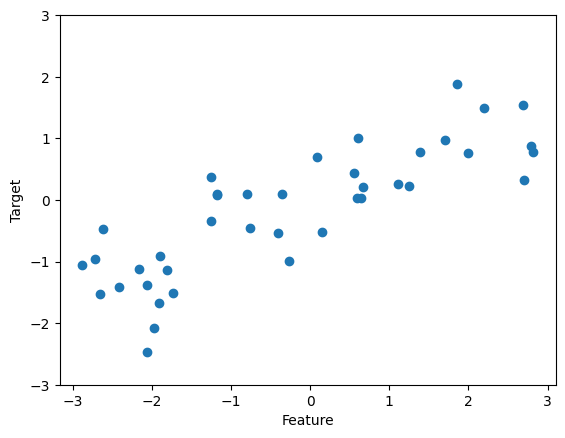

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print("Shape of cancer data:", cancer.data.shape)

Shape of cancer data: (569, 30)


In [6]:
import numpy as np
print("Sample counts per class:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


In [7]:
print("Feature names:\n", cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print("Data shape:", housing.data.shape)

Data shape: (20640, 8)


#### k-Nearest Neighbors
##### k-Neighbors classification

Predictions made by the one-nearest-neighbor model on the forge dataset:

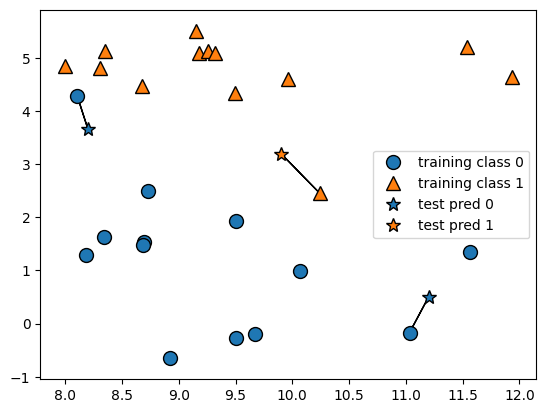

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

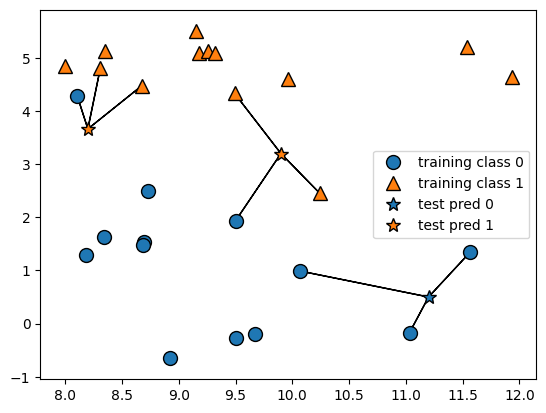

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [11]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [13]:
clf.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [14]:
print("Test set predictions:", clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


In [15]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


##### Analyzing KNeighborsClassifier

The following code produces the visualizations of the decision boundaries for one,
 three, and nine neighbors 

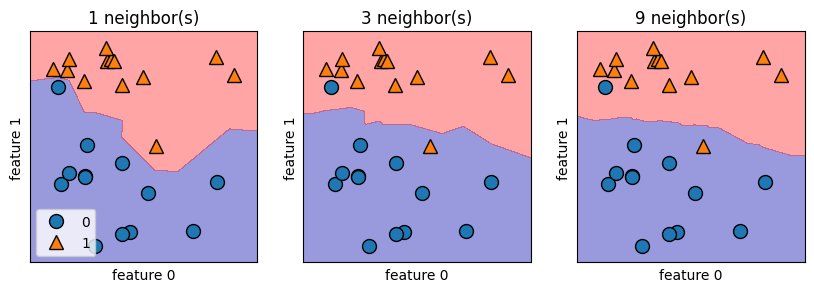

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

connection between model complexity
 and generalization 

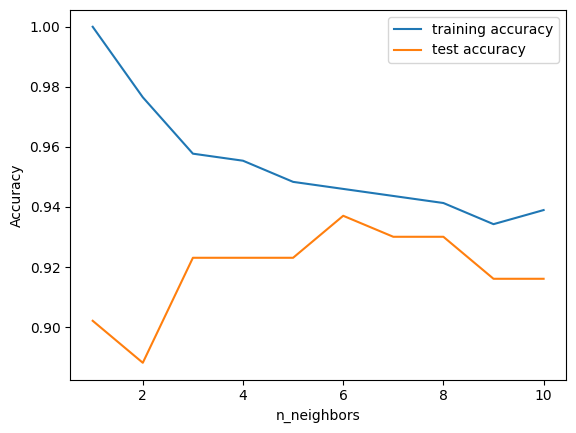

In [17]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

##### k-neighbors regression

let’s
 start by using the single nearest neighbor, this time using the wave dataset. We’ve
 added three test data points as green stars on the x-axis. The prediction using a single
 neighbor is just the target value of the nearest neighbor. These are shown as blue stars
 in Figure

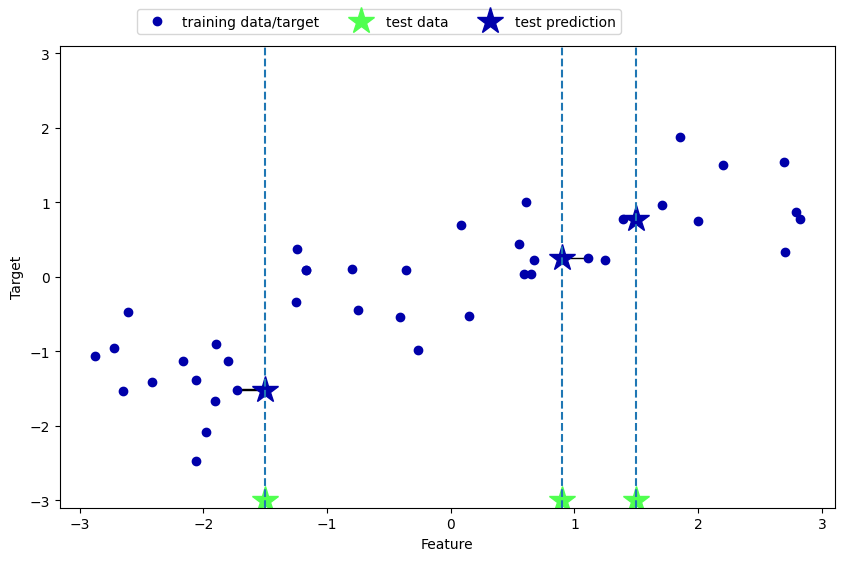

In [18]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

n > 1, so the prediction is the average, or mean, of the relevant
 neighbors

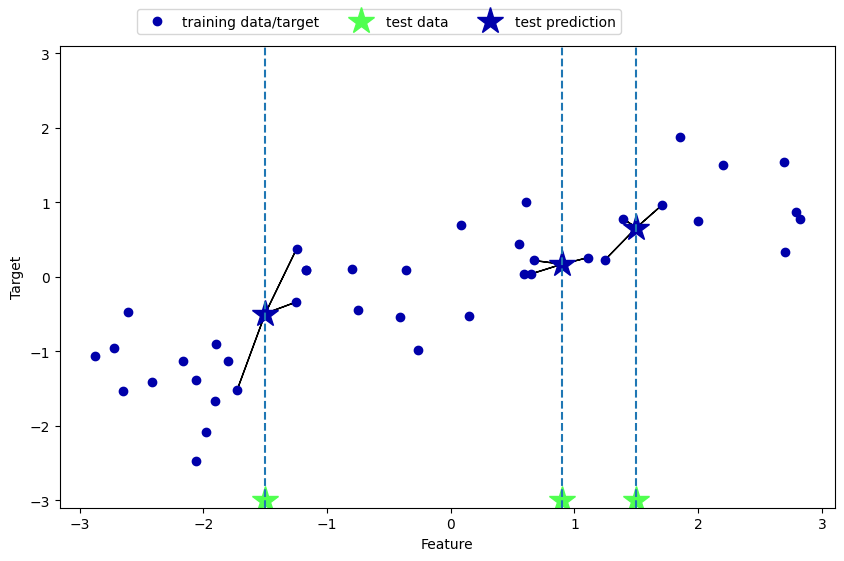

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [20]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [21]:
print("Test set predictions:\n", reg.predict(X_test))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


The R2 score, also known as the coefficient of determination, is a meas
ure of goodness of a prediction for a regression model, and yields a score between 0
 and 1. A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds
 to a constant model that just predicts the mean of the training set responses

It is calculated using the formula: R2 = 1 – (SSR / SST), where SSR represents the sum of squared residuals and SST represents the total sum of squares. R2 =  [ (nΣxy – (Σx)(Σy)) / (√nΣx2-(Σx)2 * √nΣy2-(Σy)2) ]2

In [22]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


#### Analyzing KNeighborsRegressor

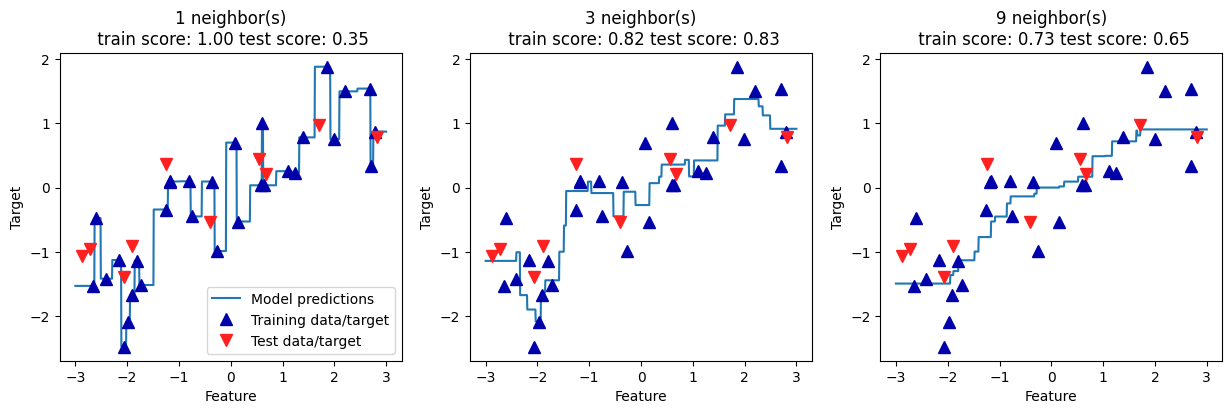

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

As we can see from the plot, using only a single neighbor, each point in the training
 set has an obvious influence on the predictions, and the predicted values go through
 all of the data points. This leads to a very unsteady prediction. Considering more
 neighbors leads to smoother predictions, but these do not fit the training data as well.

Euclidean distance is used by default: d = √[ (x
2
 – x
1
)2 + (y
2
 – y
1
)2]

##### Strengths, weaknesses, and parameters

#### Linear Models
##### Linear models for regression
\begin{align*}
\end{align*}

Trying to learn the parameters w[0] and b on our one-dimensional wave dataset
 might lead to the following line

w[0]: 0.393906  b: -0.031804


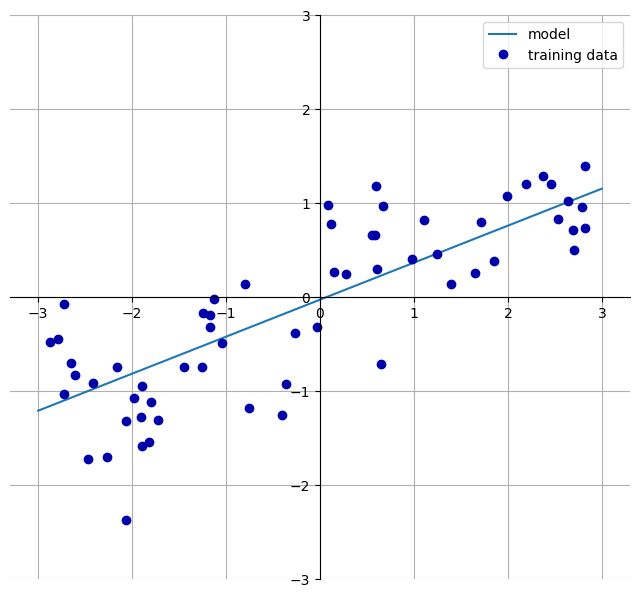

In [24]:
mglearn.plots.plot_linear_regression_wave()

For datasets with many features, linear models can be very powerful. In particular, if you have more features than training data points, any target y
 can be perfectly modeled (on the training set) as a linear function.

There are many different linear models for regression. The difference between these
 models lies in how the model parameters w and b are learned from the training data,
 and how model complexity can be controlled.

#### Linear regression aka ordinary least squares (OLS)

Linear regression finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y,
 on the training set. MSE = Σ (yi − pi)2/ n

In [25]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

The “slope” parameters (w), also called weights or coefficients, are stored in the coef_
 attribute, while the offset or intercept (b) is stored in the intercept_ attribute:

In [26]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [27]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


An R2 of around 0.66 is not very good, but we can see that the scores on the training
 and test sets are very close together. This means we are likely underfitting, not over
fitting. For this one-dimensional dataset, there is little danger of overfitting, as the
 model is very simple (or restricted).

In [28]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


With higher-dimensional datasets near models become more powerful, and there is a higher chance of overfitting. Boston Housing dataset has 506 samples and 105 derived features. When comparing training set and test set scores, we find that we predict very accurately on the training set, but the R2 on the test set is much worse. This discrepancy between performance on the training set and the test set is a clear sign of overfitting.

##### Ridge regression

Similar to OLS, but the magnitude of coefficients must be as small as possible. This constraint is an example of what is called regularization. Regularization means explicitly restricting a model to avoid overfitting.

In [29]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


The Ridge model makes a trade-off between the simplicity of the model (near-zero coefficients) and its performance on the training set. How much importance the model places on simplicity versus training set performance can be specified by the user, using the alpha parameter. In the previous example, we used the default parameter alpha=1.0.  Increasing alpha forces coefficients to move more toward zero, which decreases
 training set performance but might help generalization.

In [30]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


For very small values of alpha, coefficients are barely restricted at all, and we end up with a model that resembles LinearRegression

In [31]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


Comparing coefficient magnitudes for ridge regression with different values
 of alpha and linear regression

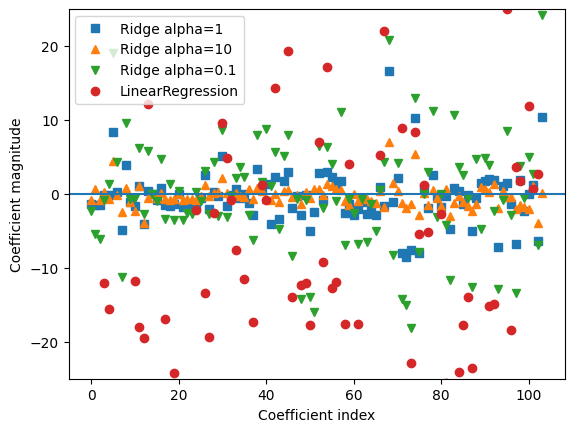

In [32]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

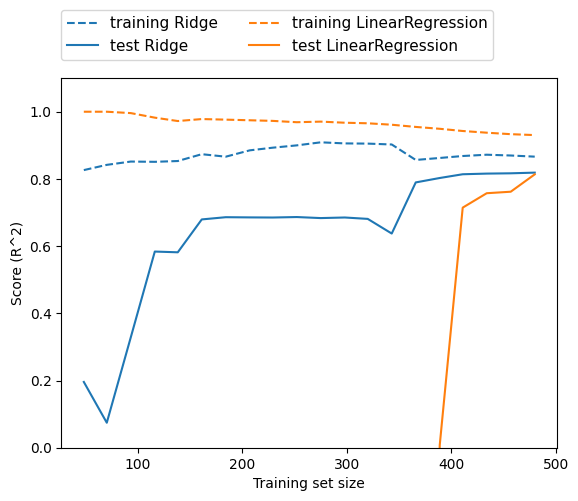

In [33]:
mglearn.plots.plot_ridge_n_samples()

As one would expect, the training score is higher than the test score for all dataset sizes, for both ridge and linear regression. Because ridge is regularized, the training score of ridge is lower than the training score for linear regression across the board. However, the test score for ridge is better, particularly for small subsets of the data. For less than 400 data points, linear regression is not able to learn anything. As more and more data becomes available to the model, both models improve, and linear regression catches up with ridge in the end. The lesson here is that with enough training data, regularization becomes less important since  If more data is added, it becomes harder for a model to overfit.

##### Lasso

 An alternative to Ridge for regularizing linear regression is Lasso. As with ridge
 regression, using the lasso also restricts coefficients to be close to zero, but in a
 slightly different way, called L1 regularization. The consequence of L1 regularization
 is that when using the lasso, some coefficients are exactly zero. This means some features are entirely ignored by the model. This can be seen as a form of automatic feature selection. Having some coefficients be exactly zero often makes a model easier to
 interpret, and can reveal the most important features of your model.

In [34]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


 As you can see, Lasso does quite badly, both on the training and the test set. This
 indicates that we are underfitting, and we find that it used only 4 of the 105 features.
 Similarly to Ridge, the Lasso also has a regularization parameter, alpha, that controls
 how strongly coefficients are pushed toward zero. In the previous example, we used
 the default of alpha=1.0. To reduce underfitting, let’s try decreasing alpha. When we
 do this, we also need to increase the default setting of max_iter (the maximum num
ber of iterations to run)

In [35]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


 A lower alpha allowed us to fit a more complex model, which worked better on the
 training and test data. The performance is slightly better than using Ridge, and we are
 using only 33 of the 105 features. This makes this model potentially easier to understand.
 If we set alpha too low, however, we again remove the effect of regularization and end
 up overfitting, with a result similar to LinearRegression

In [36]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Again, we can plot the coefficients of the different models

Text(0, 0.5, 'Coefficient magnitude')

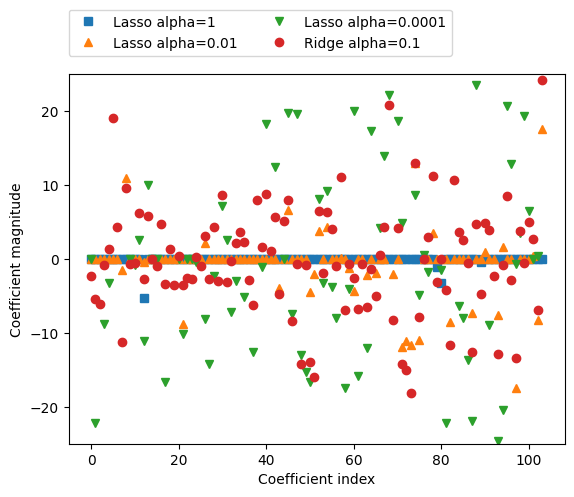

In [37]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

##### Linear models for classification

Linear models are also extensively used for classification. Let’s look at binary classification first. In this case, a prediction is made using the following formula:
 ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0

 The formula looks very similar to the one for linear regression, but instead of just
 returning the weighted sum of the features, we threshold the predicted value at zero.
 If the function is smaller than zero, we predict the class –1; if it is larger than zero, we
 predict the class +1. 

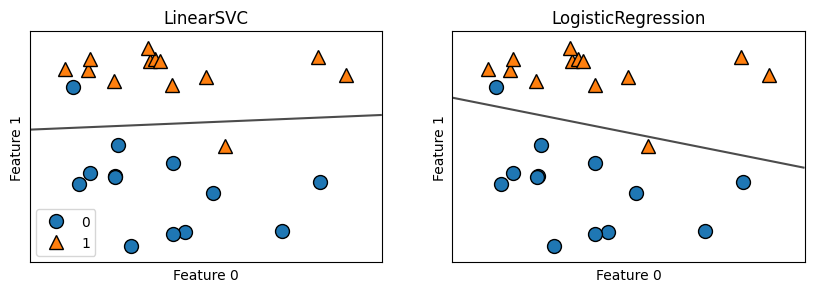

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

For LogisticRegression and LinearSVC the trade-off parameter that determines the
 strength of the regularization is called C.  Using low values of C
 will cause the algorithms to try to adjust to the “majority” of data points, while using
 a higher value of C stresses the importance that each individual data point be classified correctly. 

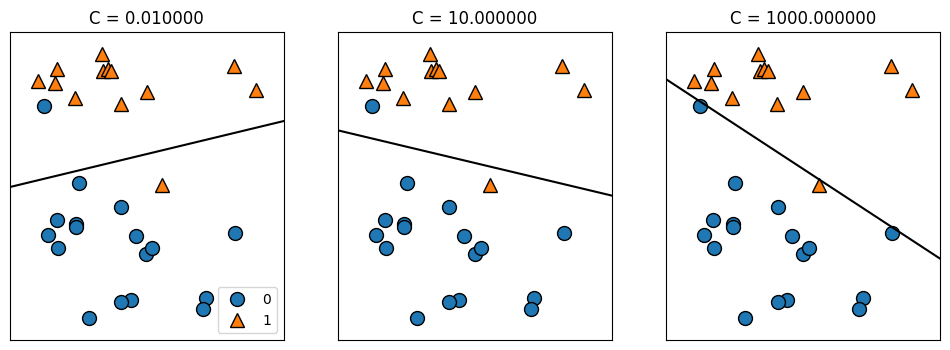

In [39]:
mglearn.plots.plot_linear_svc_regularization()

In [40]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=10000).fit(X_train, y_train) # C=1 by default
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.958
Test set score: 0.958


as training and test set performance are very
 close, it is likely that we are underfitting. Let’s try to increase C to fit a more flexible

In [41]:
logreg100 = LogisticRegression(max_iter=100000, C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.981
Test set score: 0.965


In [42]:
logreg001 = LogisticRegression(max_iter=10000, C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.951


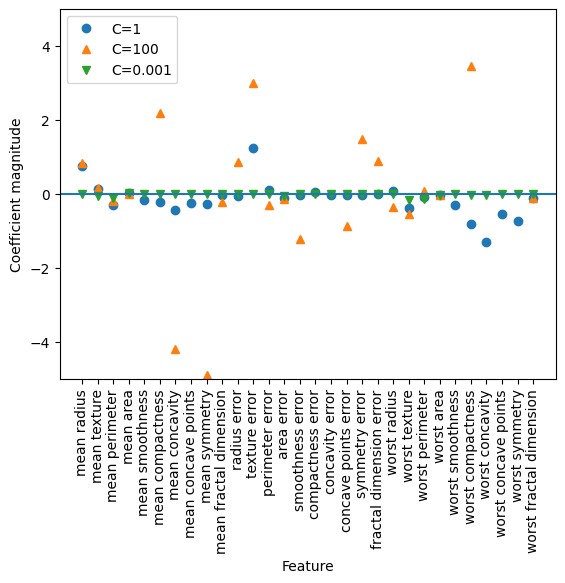

In [43]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

If we desire a more interpretable model, using L1 regularization might help, as it limits the model to using only a few features. Here is the coefficient plot and classification accuracies for L1 regularization

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


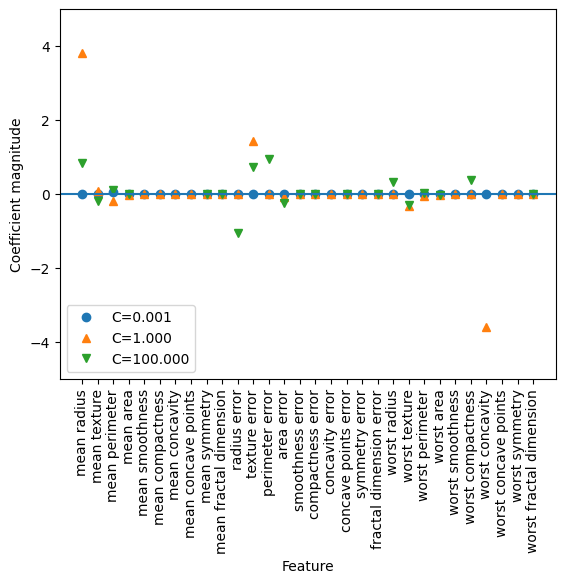

In [44]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(max_iter=1000, C=C, solver='liblinear', penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

##### Linear models for multiclass classification
\begin{align*}
\end{align*}

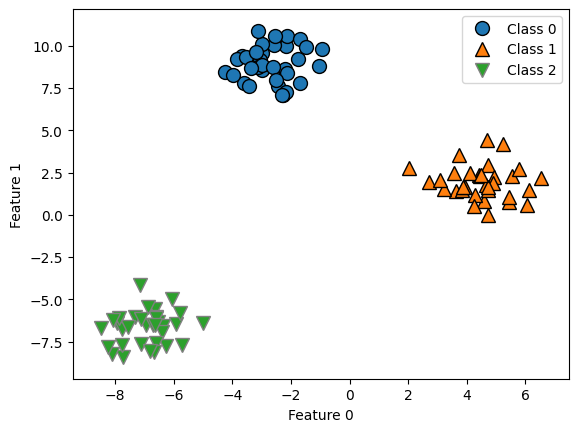

In [45]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [46]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


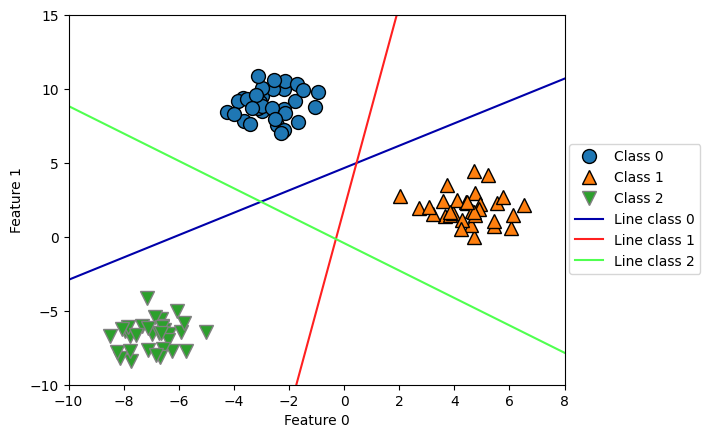

In [47]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

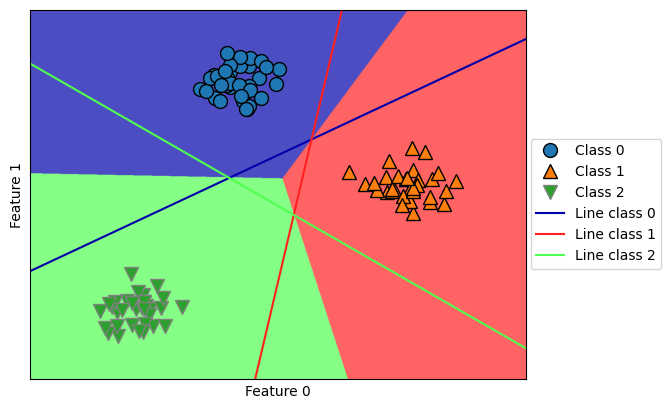

In [48]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### Strengths, weaknesses and parameters

The main parameter of linear models is the regularization parameter, called alpha in
 the regression models and C in LinearSVC and LogisticRegression. Large values for
 alpha or small values for C mean simple models. In particular for the regression models, tuning these parameters is quite important. The other decision you have to make is whether you want to
 use L1 regularization or L2 regularization. If you assume that only a few of your features are actually important, you should use L1. Otherwise, you should default to L2.  Linear models are very fast to train, and also fast to predict.  They scale to very large
 datasets and work well with sparse data. Another strength of linear models is that they make it relatively easy to understand
 how a prediction is made, using the formulas we saw earlier for regression and classification. Unfortunately, it is often not entirely clear why coefficients are the way they
 are.Linear models often perform well when the number of features is large compared to
 the number of samples. They are also often used on very large datasets, simply
 because it’s not feasible to train other models. However, in lower-dimensional spaces,
 other models might yield better generalization performance. 

In [49]:
# instantiate model and fit it in one line
logreg = LogisticRegression(max_iter=10000).fit(X_train, y_train)

In [50]:
# another way to fit and train
logreg = LogisticRegression(max_iter=10000)
y_pred = logreg.fit(X_train, y_train).predict(X_test)

In [51]:
# Finally, you can even do model instantiation, fitting, and predicting in one line
y_pred = LogisticRegression(max_iter=10000).fit(X_train, y_train).predict(X_test)

In [52]:
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

### Naive Bayes Classifiers

 The BernoulliNB classifier counts how often every feature of each class is not zero. Multinomial takes the count of features (like count of word in text). Gausian takes continuous data.

In [54]:
# example of using it:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# of course other steps of train_test_split, fit, and prediction must be done for the data.

#### Strengths, weaknesses and parameters

 MultinomialNB and BernoulliNB have a single parameter, alpha, which controls
 model complexity. The way alpha works is that the algorithm adds to the data alpha
 many virtual data points that have positive values for all the features. This results in a
 “smoothing” of the statistics. A large alpha means more smoothing, resulting in less
 complex models.  GaussianNB is mostly used on very high-dimensional data, while the other two variants of naive Bayes are widely used for sparse count data such as text. MultinomialNB
 usually performs better than BinaryNB, particularly on datasets with a relatively large
 number of nonzero features (i.e., large documents).

### Decision trees

##### Building decision trees

##### Controlling complexity of decision trees

In [55]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [56]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


#### Analyzing Decision Trees

#### Feature Importance in trees

In [57]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


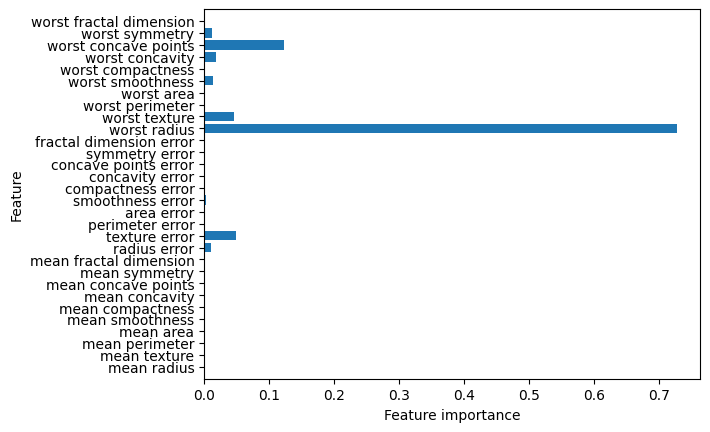

In [58]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

 Here we see that the feature used in the top split (“worst radius”) is by far the most
 important feature. This confirms our observation in analyzing the tree that the first
 level already separates the two classes fairly well.
 However, if a feature has a low feature_importance, it doesn’t mean that this feature
 is uninformative. It only means that the feature was not picked by the tree, likely
 because another feature encodes the same information.

 Let’s look into this in more detail, using a dataset of historical computer memory
 (RAM) prices. Figure below shows the dataset, with the date on the x-axis and the price
 of one megabyte of RAM in that year on the y-axis

Text(0, 0.5, 'Price in $/Mbyte')

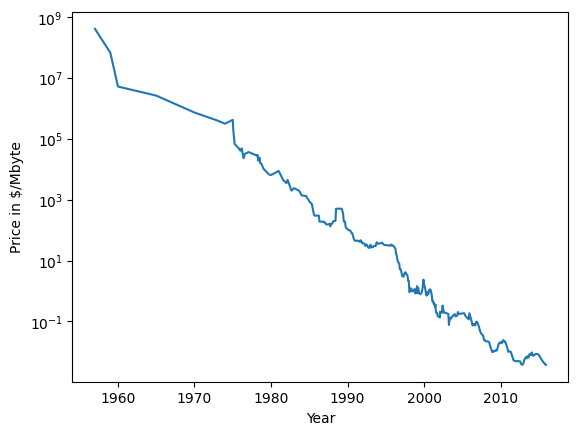

In [59]:
import os
import pandas as pd
ram_prices = pd.read_csv(os.path.join("ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [60]:
from sklearn.tree import DecisionTreeRegressor
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date.to_numpy()[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

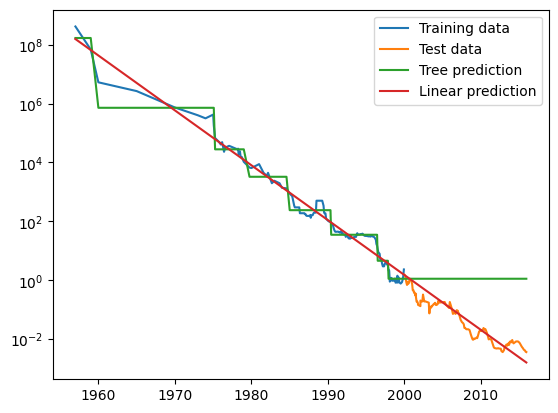

In [61]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

The linear model approximates
 the data with a line, as we knew it would. This line provides quite a good forecast for
 the test data (the years after 2000), while glossing over some of the finer variations in
 both the training and the test data. The tree model, on the other hand, makes perfect
 predictions on the training data; we did not restrict the complexity of the tree, so it
 learned the whole dataset by heart. However, once we leave the data range for which
 the model has data, the model simply keeps predicting the last known point. The tree
 has no ability to generate “new” responses, outside of what was seen in the training
 data. This shortcoming applies to all models based on trees.

#### Strengths, weaknesses and parameters

As discussed earlier, the parameters that control model complexity in decision trees
 are the pre-pruning parameters that stop the building of the tree before it is fully
 developed. Usually, picking one of the pre-pruning strategies—setting either max_depth, max_leaf_nodes, or min_samples_leaf—is sufficient to prevent overfitting.
 Decision trees have two advantages over many of the algorithms we’ve discussed so
 far: the resulting model can easily be visualized and understood by nonexperts (at
 least for smaller trees), and the algorithms are completely invariant to scaling of the
 data. As each feature is processed separately, and the possible splits of the data don’t
 depend on scaling, no preprocessing like normalization or standardization of features
 is needed for decision tree algorithms. In particular, decision trees work well when
 you have features that are on completely different scales, or a mix of binary and continuous features.
 The main downside of decision trees is that even with the use of pre-pruning, they
 tend to overfit and provide poor generalization performance. Therefore, in most
 applications, the ensemble methods we discuss next are usually used in place of a single decision tree.

#### Ensembles of Decision Trees

Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2) # n_estimators = number of trees
forest.fit(X_train, y_train)

,n_estimators,5
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


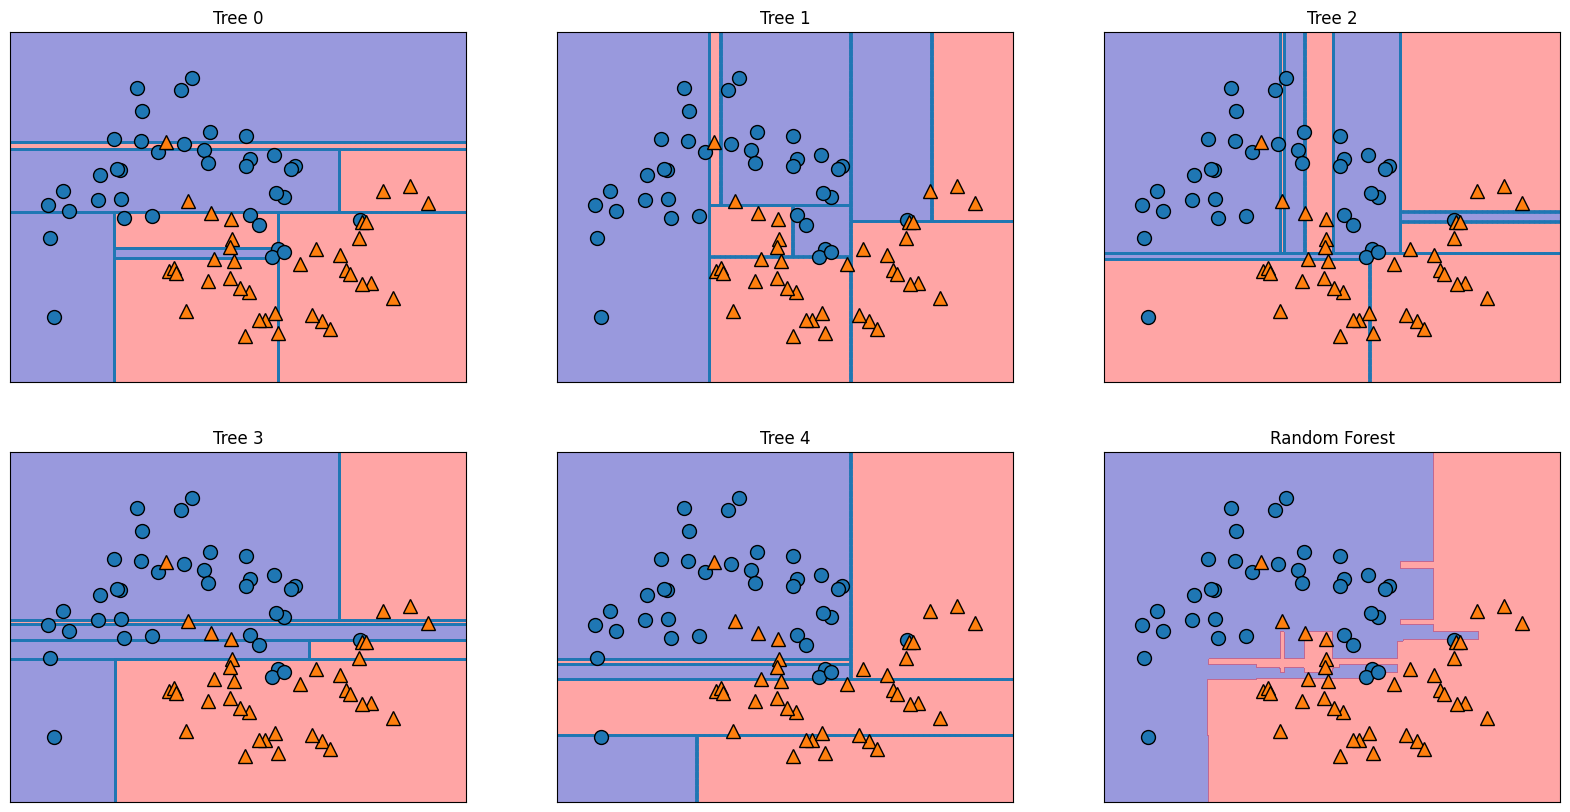

In [63]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


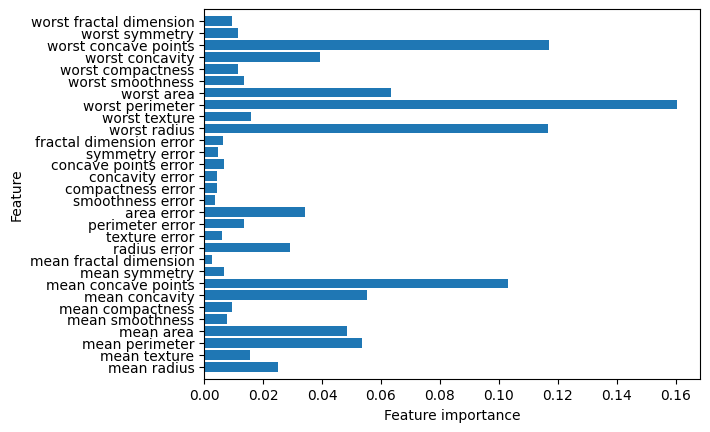

In [65]:
plot_feature_importances_cancer(forest)

###### Strengths, weaknesses, and parameters

Random forests for regression and classification are currently among the most widely used machine learning methods. They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

 you can use the n_jobs parameter to adjust the number of
 cores to use. Using more CPU cores will result in linear speed-ups (using two cores,
 the training of the random forest will be twice as fast), but specifying n_jobs larger
 than the number of cores will not help. You can set n_jobs=-1 to use all the cores in
 your computer.

 Random forests don’t tend to perform well on very high dimensional, sparse data,
 such as text data. For this kind of data, linear models might be more appropriate. If time and memory are important in an application, it might make sense to use a
 linear model instead

For n_estimators, larger is always better. Averaging more trees will yield a more robust ensemble by reducing overfitting. However,
 there are diminishing returns, and more trees need more memory and more time to
 train. A common rule of thumb is to build “as many as you have time/memory for.”

#### Gradient Boosted Regression Trees (Gradient Boosting Machines)

Here is an example of using GradientBoostingClassifier on the Breast Cancer
 dataset. By default, 100 trees of maximum depth 3 and a learning rate of 0.1 are used

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


As the training set accuracy is 100%, we are likely to be overfitting. To reduce overfitting, we could either apply stronger pre-pruning by limiting the maximum depth or
 lower the learning rate

In [67]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [68]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.958


Both methods of decreasing the model complexity reduced the training set accuracy,
 as expected. In this case, lowering the maximum depth of the trees provided a significant improvement of the model, while lowering the learning rate only increased the
 generalization performance slightly.

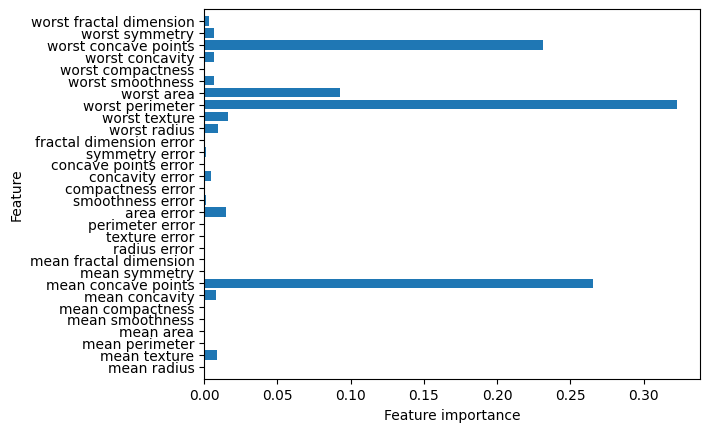

In [69]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

 If you want to apply gradient boosting to a large-scale problem, it might be worth
 looking into the xgboost package and its Python interface, which at the time of writing is faster (and sometimes easier to tune) than the scikit-learn implementation of
 gradient boosting on many datasets.

##### Strengths, weaknesses and parameters

Their main drawback
 is that they require careful tuning of the parameters and may take a long time to
 train.

 In contrast to random forests, where a higher n_estimators value is always better, increasing n_estimators in gradient boosting leads to a
 more complex model, which may lead to overfitting.

#### Kernelized Support Vector Machines
#### Linear Models and Non-linear Features

Text(0, 0.5, 'Feature 1')

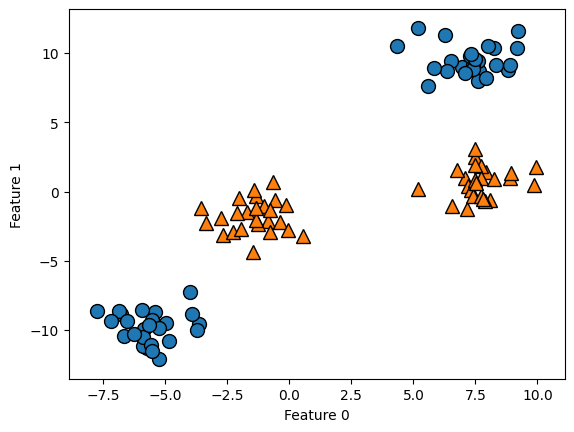

In [70]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

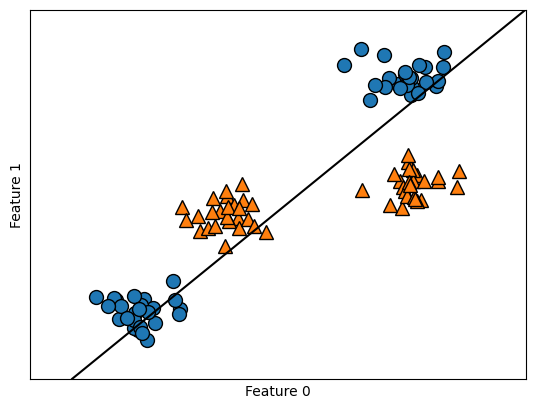

In [71]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

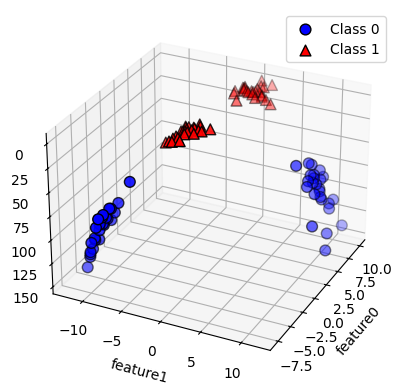

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed to register 3D projection

# Add squared second feature (X[:, 1] ** 2)
X_new = np.hstack([X, X[:, 1:] ** 2])

# Create 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', elev=-152, azim=-26)

# Split data by label
mask = y == 0

# Scatter plot for class 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           s=60, edgecolor='k', label='Class 0')

# Scatter plot for class 1
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r',
           marker='^', s=60, edgecolor='k', label='Class 1')

# Axis labels
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

# Optional legend
ax.legend()

plt.show()

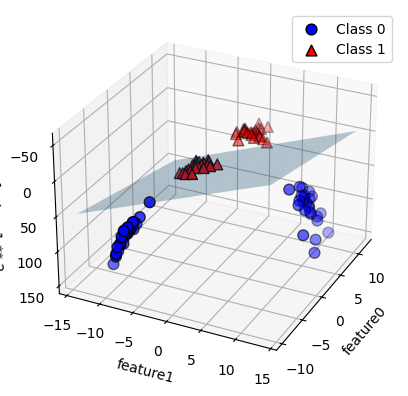

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import LinearSVC

# Fit linear SVM on 3D data
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# Prepare 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', elev=-152, azim=-26)

# Create grid
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)

# Compute corresponding Z (feature1^2) for decision boundary
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

# Plot the decision boundary surface
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

# Plot the points
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           s=60, edgecolor='k', label='Class 0')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r',
           marker='^', s=60, edgecolor='k', label='Class 1')

# Labels
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

# Optional legend
ax.legend()

plt.show()


#### The Kernel Trick
#### Understanding SVMs
\begin{align*}
\end{align*}

 The gamma parameter is the one shown in the formula given in the previous section,
 which controls the width of the Gaussian kernel. It determines the scale of what it
 means for points to be close together. The C parameter is a regularization parameter,
 similar to that used in the linear models. It limits the importance of each point

Text(0, 0.5, 'Feature 1')

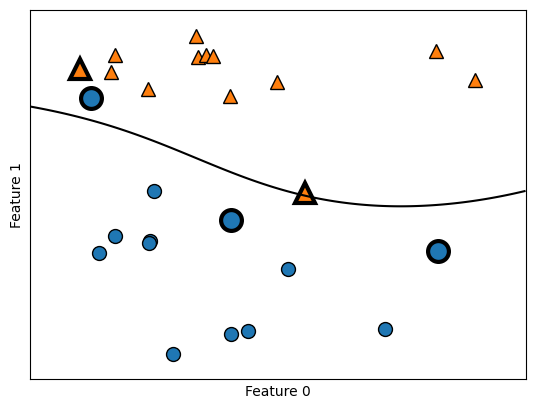

In [75]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### Tuning SVM parameters

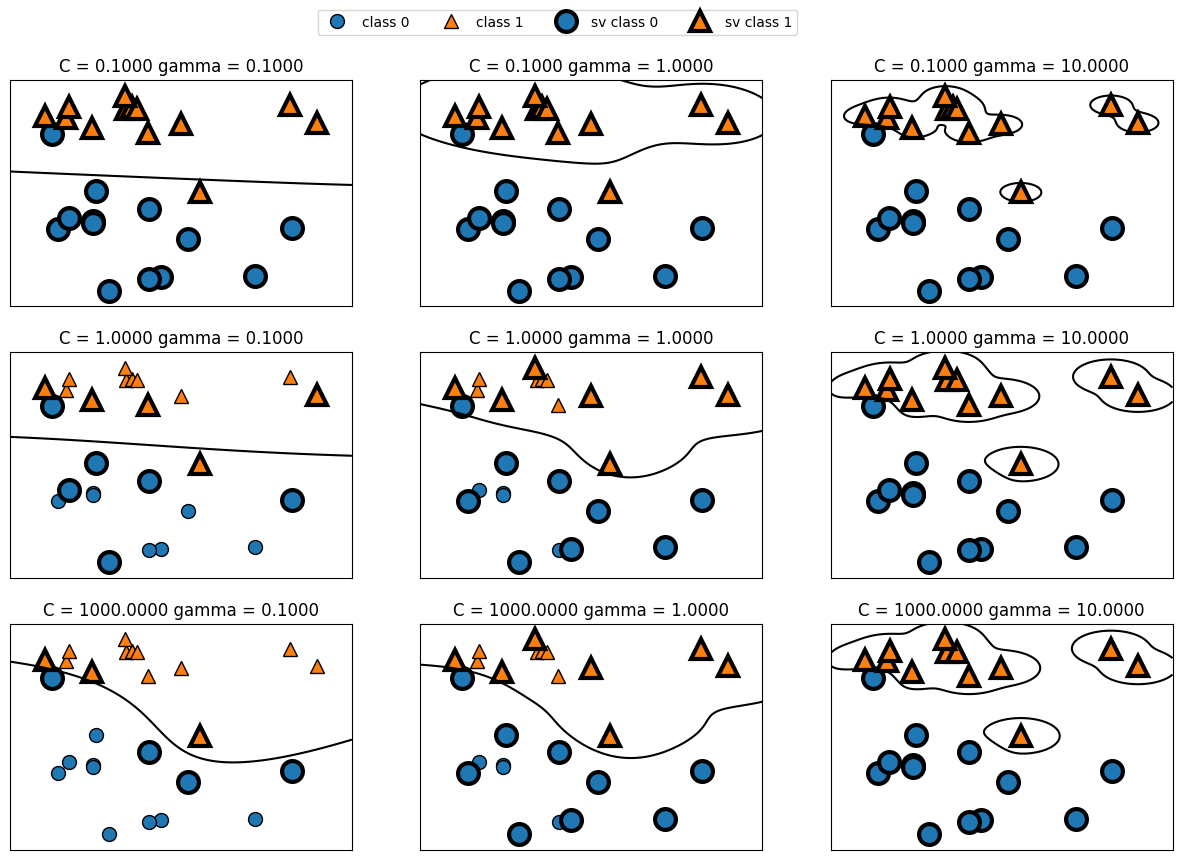

In [76]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

A
 low value of gamma means that the decision boundary will vary slowly, which yields a
 model of low complexity, while a high value of gamma yields a more complex model.

 Increasing C, as shown on the bottom right, allows these points to have a
 stronger influence on the model and makes the decision boundary bend to correctly
 classify them.

In [77]:
# By default, C=1 and gamma=1/n_features:

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.94


Text(0, 0.5, 'Feature magnitude')

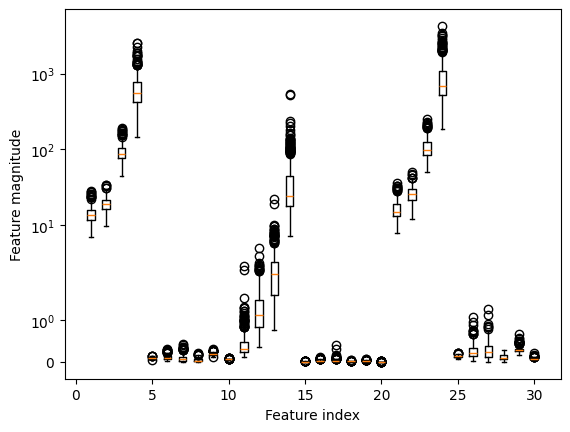

In [78]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

From this plot we can determine that features in the Breast Cancer dataset are of
 completely different orders of magnitude. This can be somewhat of a problem for
 other models (like linear models), but it has devastating effects for the kernel SVM.

##### Preprocessing data for SVMs

 One way to resolve this problem is by rescaling each feature so that they are all
 approximately on the same scale. A common rescaling method for kernel SVMs is to
 scale the data such that all features are between 0 and 1. (Normalization)

In [79]:
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))

Minimum for each feature
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [80]:
# use THE SAME transformation on the test set,
# using min and range of the training set.
X_test_scaled = (X_test - min_on_training) / range_on_training

In [81]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.972


In [82]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


#### Strengths, weaknesses and parameters

### Neural Networks (Deep Learning)
#### The Neural Network Model

Visualization of logistic regression, where input features and predictions are shown as nodes, and the coefficients are connections between the nodes


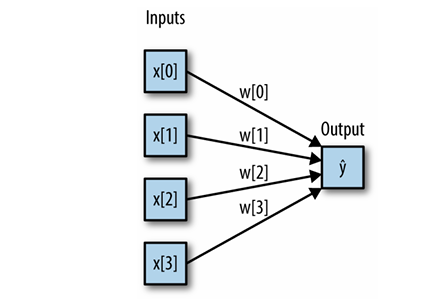

In [83]:
print("Visualization of logistic regression, where input features and predictions are shown as nodes, and the coefficients are connections between the nodes")
from IPython.display import Image
Image(filename='logistic regression.png') 

Here, we will only discuss some relatively simple methods, namely
 multilayer perceptrons for classification and regression, that can serve as a starting
 point for more involved deep learning methods. Multilayer perceptrons (MLPs) are
 also known as (vanilla) feed-forward neural networks, or sometimes just neural
 networks.

VIllustration of a multilayer perceptron with a single hidden layer


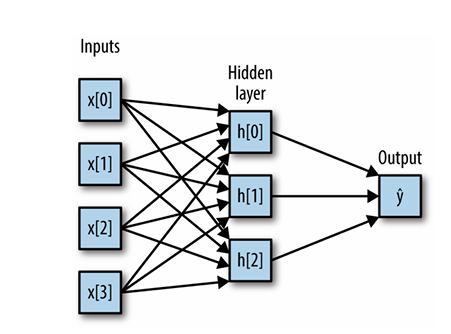

In [84]:
print("VIllustration of a multilayer perceptron with a single hidden layer")
from IPython.display import Image
Image(filename='single hidden layer.png') 

Text(0, 0.5, 'relu(x), tanh(x)')

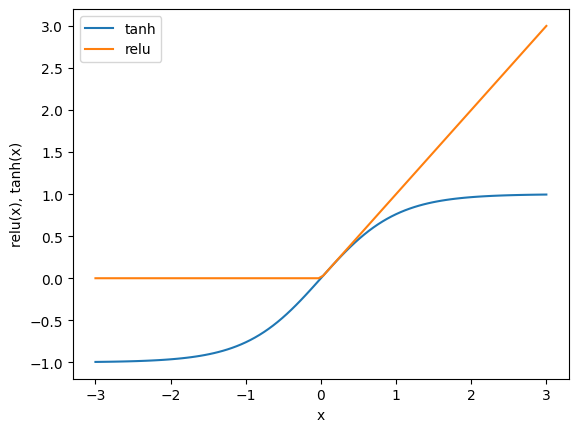

In [85]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

VIllustration of a multilayer perceptron with a single hidden layer


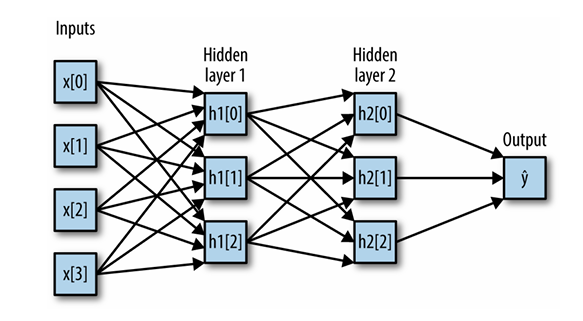

In [86]:
print("VIllustration of a multilayer perceptron with a single hidden layer")
from IPython.display import Image
Image(filename='two hidden layers.png') 

#### Tuning Neural Networks

Text(0, 0.5, 'Feature 1')

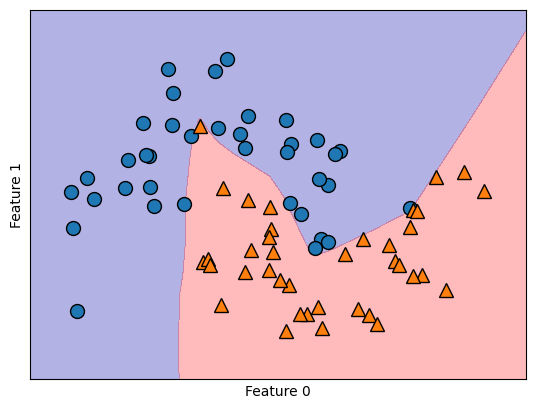

In [87]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

By default, the MLP uses 100 hidden nodes, which is quite a lot for this small dataset.
 We can reduce the number (which reduces the complexity of the model) and still get
 a good resul

Text(0, 0.5, 'Feature 1')

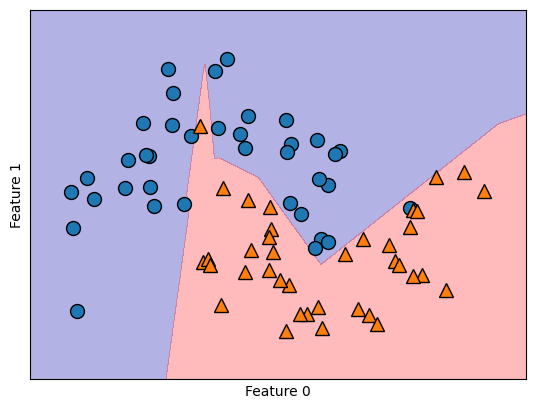

In [88]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

 If we want
 a smoother decision boundary, we could add more hidden units,
 add a second hidden layer, or use the tanh nonlinearity 

Text(0, 0.5, 'Feature 1')

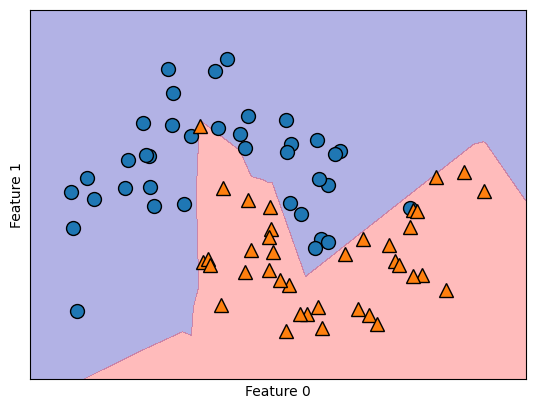

In [89]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

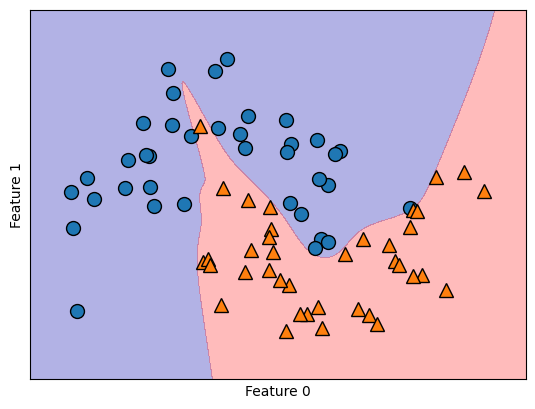

In [90]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity.
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

we can also control the complexity of a neural network by using an l2 penalty
 to shrink the weights toward zero, as we did in ridge regression and the linear classifiers. The parameter for this in the MLPClassifier is alpha (as in the linear regression
 models), and it’s set to a very low value (little regularization) by default. 

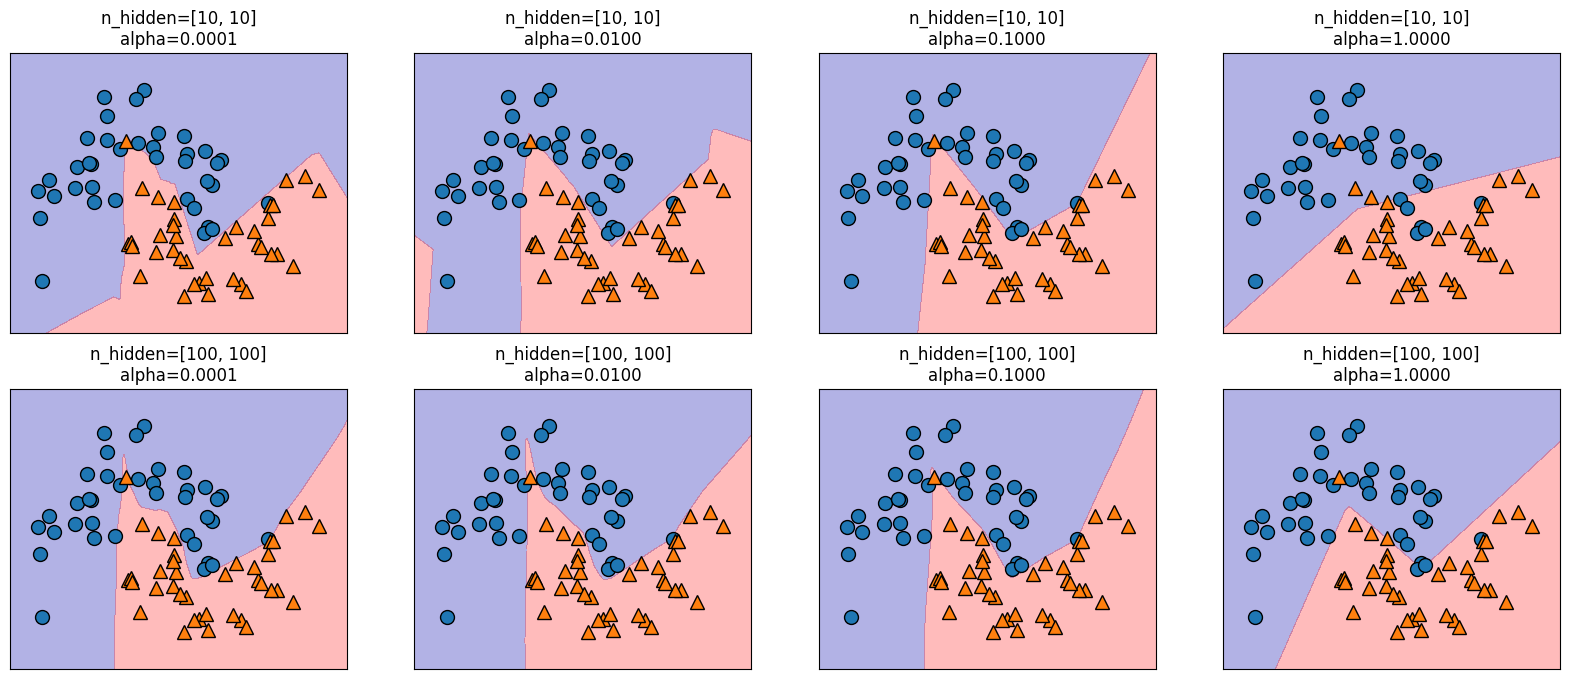

In [91]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha, max_iter=1000)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

 An important property of neural networks is that their weights are set randomly
 before learning is started, and this random initialization affects the model that is
 learned. That means that even when using exactly the same parameters, we can
 obtain very different models when using different random seeds. If the networks are
 large, and their complexity is chosen properly, this should not affect accuracy too
 much, but it is worth keeping in mind (particularly for smaller networks).

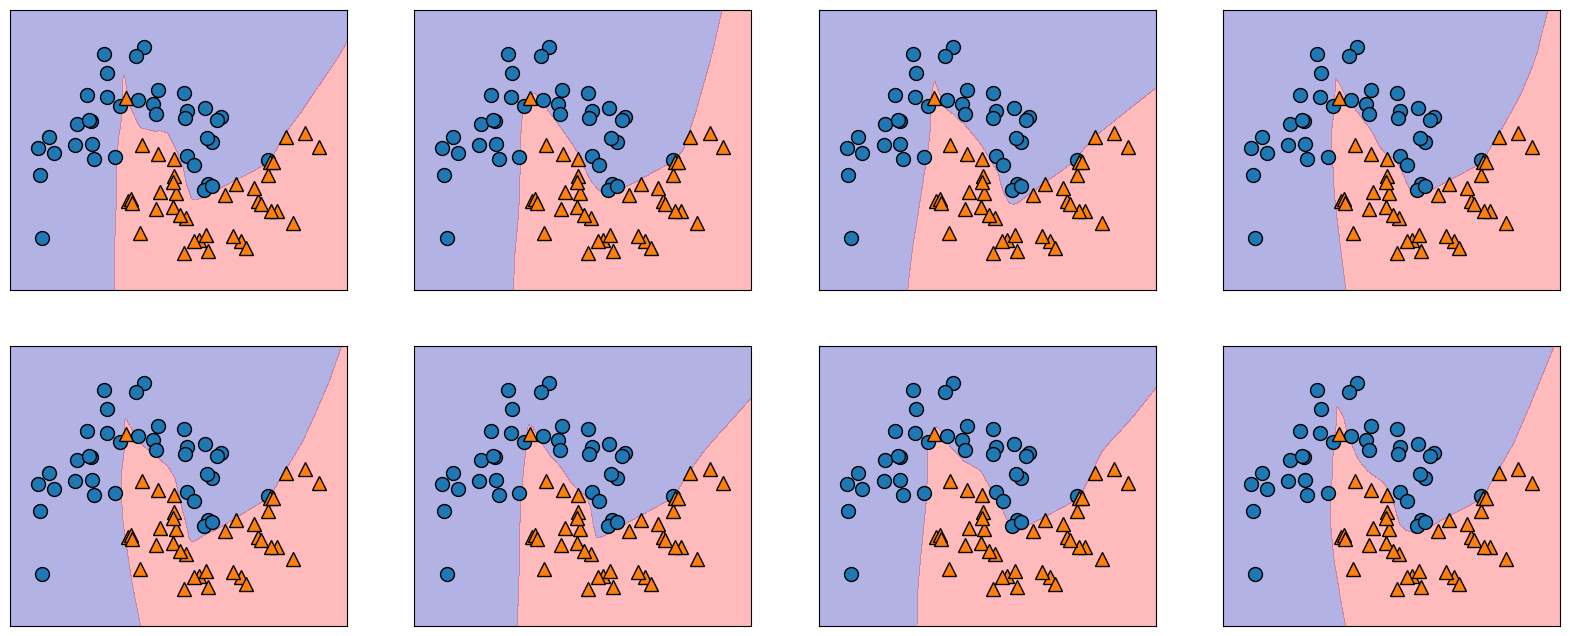

In [92]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [93]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


 The accuracy of the MLP is quite good, but not as good as the other models. As in the
 earlier SVC example, this is likely due to scaling of the data. Neural networks also
 expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1. We must rescale our data so that it fulfills these requirements. Again,
 we will do this by hand here, but we’ll introduce the StandardScaler to do this automatically

In [95]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0, max_iter=1000)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


We got a
 warning from the model, though, that tells us that the maximum number of iterations
 has been reached. This is part of the adam algorithm for learning the model, and tells
 us that we should increase the number of iterations  
  ConvergenceWarning:  
    Stochastic Optimizer: Maximum iterations reached and the optimization  
    hasn't converged yet.

Increasing the number of iterations only increased the training set performance, not
 the generalization performance. Still, the model is performing quite well. As there is
 some gap between the training and the test performance, we might try to decrease the
 model’s complexity to get better generalization performance.

Here, we choose to
 increase the alpha parameter (quite aggressively, from 0.0001 to 1) to add stronger
 regularization of the weights:

In [97]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


While it is possible to analyze what a neural network has learned, this is usually much
 trickier than analyzing a linear model or a tree-based model. One way to introspect
 what was learned is to look at the weights in the model. You can see an example of
 this in the scikit-learn example gallery. For the Breast Cancer dataset, this might
 be a bit hard to understand. The following plot shows the weights that
 were learned connecting the input to the first hidden layer. The rows in this plot correspond to the 30 input features, while the columns correspond to the 100 hidden
 units. Light colors represent large positive values, while dark colors represent negative values:

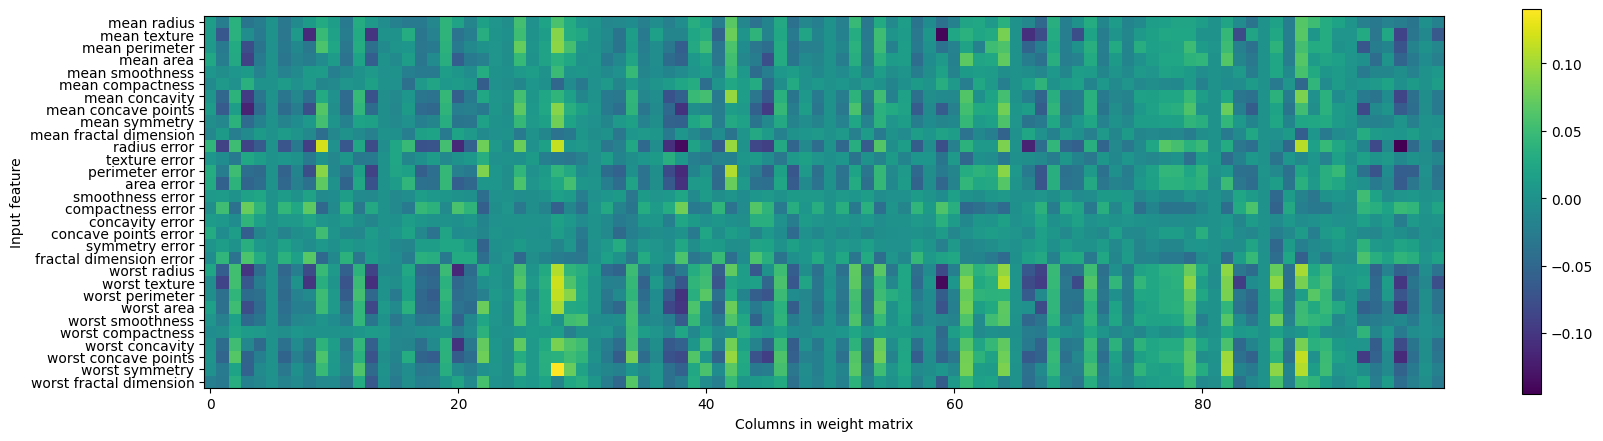

In [98]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

#### Strengths, weaknesses and parameters
##### Estimating complexity in neural networks

One of their main advantages is that they are able to capture information contained in large amounts of data and build incredibly complex models.
 Given enough computation time, data, and careful tuning of the parameters, neural
 networks often beat other machine learning algorithms (for classification and regression tasks).

This brings us to the downsides. Neural networks—particularly the large and powerful ones—often take a long time to train. They also require careful preprocessing of
 the data, as we saw here. Similarly to SVMs, they work best with “homogeneous”
 data, where all the features have similar meanings. For data that has very different
 kinds of features, tree-based models might work better. Tuning neural network
 parameters is also an art unto itself. 

The most important parameters are the number of layers and the number of hidden units per layer. You should start with one or
 two hidden layers, and possibly expand from there. 

A common way to adjust parameters in a neural network is to first create a network
 that is large enough to overfit, making sure that the task can actually be learned by
 the network. Then, once you know the training data can be learned, either shrink the
 network or increase alpha to add regularization, which will improve generalization
 performance.

There is also the question of how to learn the model, or the
 algorithm that is used for learning the parameters, which is set using the algorithm
 parameter. There are two easy-to-use choices for algorithm. The default is 'adam',
 which works well in most situations but is quite sensitive to the scaling of the data (so
 it is important to always scale your data to 0 mean and unit variance). The other one
 is 'l-bfgs', which is quite robust but might take a long time on larger models or
 larger datasets. There is also the more advanced 'sgd' option, which is what many
 deep learning researchers use. The 'sgd' option comes with many additional parameters that need to be tuned for best results. When starting to work with MLPs, it's recommended to
 stick to 'adam' and 'l-bfgs'.

### Uncertainty estimates from classifiers

 There are two different functions in scikit-learn that can be used to obtain uncertainty estimates from classifiers: decision_function and predict_proba. Most (but
 not all) classifiers have at least one of them, and many classifiers have both. Let’s look
 at what these two functions do on a synthetic two-dimensional dataset, when building a GradientBoostingClassifier classifier, which has both a decision_function
 and a predict_proba method

In [99]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# we rename the classes "blue" and "red" for illustration purposes:
y_named = np.array(["blue", "red"])[y]

# we can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


#### The Decision Function

 In the binary classification case, the return value of decision_function is of shape
 (n_samples,), and it returns one floating-point number for each sample:

In [100]:
print("X_test.shape:", X_test.shape)
print("Decision function shape:",
      gbrt.decision_function(X_test).shape)

X_test.shape: (25, 2)
Decision function shape: (25,)


 This value encodes how strongly the model believes a data point to belong to the
 “positive” class, in this case class 1. Positive values indicate a preference for the positive class, and negative values indicate a preference for the “negative” (other) class:

In [101]:
# show the first few entries of decision_function
print("Decision function:", gbrt.decision_function(X_test)[:6])

Decision function: [ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


In [102]:
print("Thresholded decision function:\n",
      gbrt.decision_function(X_test) > 0)
print("Predictions:\n", gbrt.predict(X_test))

Thresholded decision function:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


 In the following example we plot the decision_function for all points in the 2D
 plane using a color coding, next to a visualization of the decision boundary, as we saw
 earlier. We show training points as circles and test data as triangles 

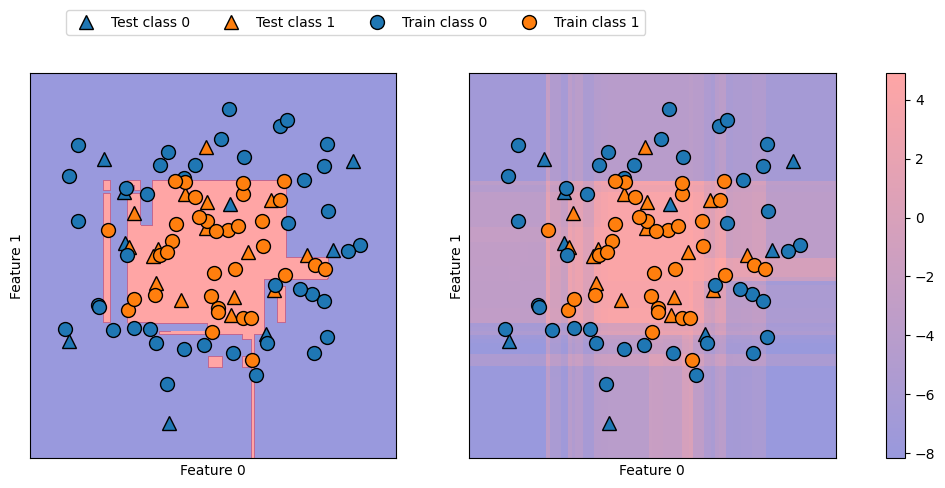

In [105]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

#### Predicting Probabilities

The output of predict_proba is a probability for each class, and is often more easily
 understood than the output of decision_function. It is always of shape (n_samples,
 2) for binary classification

In [106]:
print("Shape of probabilities:", gbrt.predict_proba(X_test).shape)

Shape of probabilities: (25, 2)


The first entry in each row is the estimated probability of the first class, and the second entry is the estimated probability of the second class. Because it is a probability,
 the output of predict_proba is always between 0 and 1, and the sum of the entries
 for both classes is always 1

In [107]:
# show the first few entries of predict_proba
print("Predicted probabilities:")
print(gbrt.predict_proba(X_test[:6]))

Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


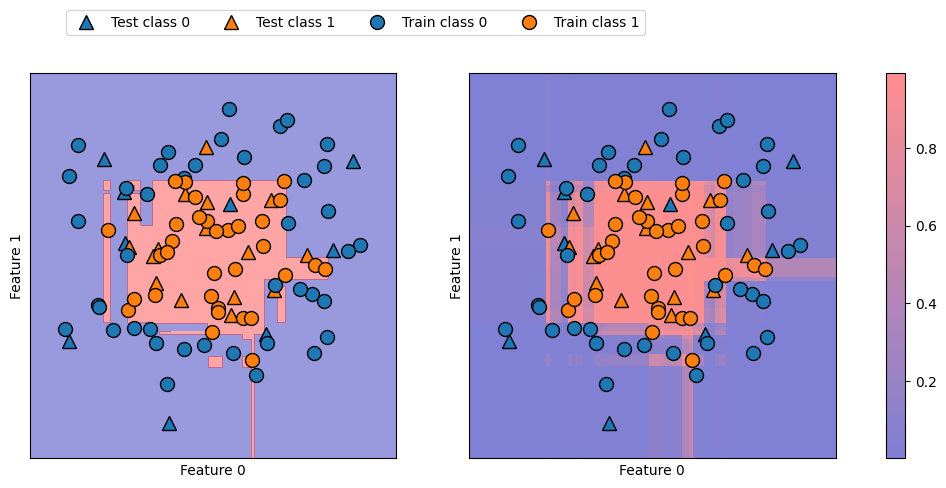

In [109]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
# don't want a transparent colorbar
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

The boundaries in this plot are much more well-defined, and the small areas of
 uncertainty are clearly visible.

#### Uncertainty in multiclass classification

In [110]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.01
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [111]:
print("Decision function shape:", gbrt.decision_function(X_test).shape)
# plot the first few entries of the decision function
print("Decision function:")
print(gbrt.decision_function(X_test)[:6, :])

Decision function shape: (38, 3)
Decision function:
[[-0.89604809  1.14724958 -0.82754003]
 [ 1.16113086 -0.80789044 -0.82827067]
 [-0.89091511 -0.77671169  1.19653416]
 [-0.89604809  1.14724958 -0.82754003]
 [-0.89763468  0.96497584 -0.10374792]
 [ 1.16113086 -0.80789044 -0.82827067]]


In [112]:
print("Argmax of decision function:")
print(np.argmax(gbrt.decision_function(X_test), axis=1))
print("Predictions:")
print(gbrt.predict(X_test))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [113]:
# show the first few entries of predict_proba
print("Predicted probabilities:")
print(gbrt.predict_proba(X_test)[:6])
# show that sums across rows are one
print("Sums:", gbrt.predict_proba(X_test)[:6].sum(axis=1))

Predicted probabilities:
[[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
Sums: [1. 1. 1. 1. 1. 1.]


In [116]:
print("Argmax of predicted probabilities:")
print(np.argmax(gbrt.predict_proba(X_test), axis=1))
print("Predictions:")
print(gbrt.predict(X_test))

Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


### Summary and Outlook